In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [9]:
# === CONFIGURATION === #
drone_audio_path = "D:/FYP/Datasets/Paper sourced/SegmentedAudio_HolybroS500/HolybroS500_Ascent_1_seg_0.wav"  # Replace with actual drone audio file
calibration_audio_path = "D:/FYP/Datasets/Paper sourced/Calibration.wav"  # Replace with calibration file (1kHz @ 94dB SPL)
frame_length = 0.05  # Frame length in seconds (50ms)
hop_length = 0.01  # Hop length in seconds (10ms)

# Load calibration audio (force to 16,000 Hz)
calib_signal, sr = librosa.load(calibration_audio_path, sr=16000)
calib_signal = (calib_signal * 32768) / 20.0  # Apply NEAPTIDE correction

# Load drone audio (force to same sampling rate as calibration)
signal, sr_drone = librosa.load(drone_audio_path, sr=16000)  # Force to 16kHz
signal = (signal * 32768) / 20.0  # Apply NEAPTIDE correction

# Ensure sample rates match
if sr != sr_drone:
    raise ValueError("Sampling rates of calibration and drone audio do not match!")


In [10]:

# === STEP 2: Compute RMS for Calibration File === #
calib_rms = np.sqrt(np.mean(calib_signal ** 2))  # Compute RMS of calibration signal

# === STEP 3: Frame-wise RMS Calculation for Drone Audio === #
frame_size = int(sr * frame_length)  # Convert frame length to samples
hop_size = int(sr * hop_length)  # Convert hop length to samples

# Compute RMS in each frame
rms_values = librosa.feature.rms(y=signal, frame_length=frame_size, hop_length=hop_size)[0]

# Compute time axis for plotting
time_axis = librosa.times_like(rms_values, sr=sr, hop_length=hop_size)

# === STEP 4: Convert RMS to SPL (Using Calibration) === #
# SPL Formula: SPL = 94 + 20 * log10(RMS_Drone / RMS_Calibration)
spl_values = 94 + 20 * np.log10(rms_values / calib_rms)


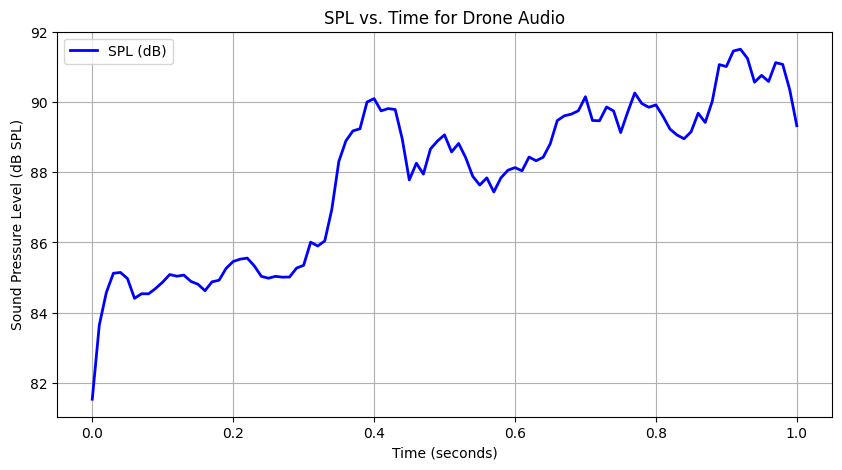

In [11]:
# === STEP 5: Plot SPL vs Time Graph === #
plt.figure(figsize=(10, 5))
plt.plot(time_axis, spl_values, label="SPL (dB)", color="b", linewidth=2)
plt.xlabel("Time (seconds)")
plt.ylabel("Sound Pressure Level (dB SPL)")
plt.title("SPL vs. Time for Drone Audio")
plt.grid()
plt.legend()
plt.show()